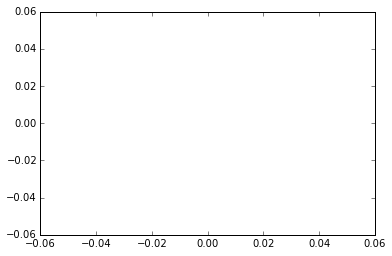

In [2]:
import cPickle as pickle
import os
import numpy as np
import theano
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def float32(k):
    return np.cast['float32'](k)

class PlotLosses(object):
    def __init__(self, figsize=(8, 6)):
        plt.plot([],[])
    def __call__(self, nn, train_history):
        train_loss=np.array([i["train_loss"] for i in nn.train_history_])
        valid_loss=np.array([i["valid_loss"] for i in nn.train_history_])
        
        plt.gca().cla()
        plt.plot(train_loss, label="train")
        plt.plot(valid_loss, label="test")
        
        plt.legend()
        plt.draw()

class AdjustVariable(object):
    def __init__(self, name, start=0.03, stop=0.001):
        self.name=name
        self.start, self.stop=start, stop
        self.ls=None
    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls=np.linspace(self.start, self.stop, nn.max_epochs)
        epoch=train_history[-1]['epoch']
        new_value=float32(self.ls[epoch-1])
        getattr(nn, self.name).set_value(new_value)

def load_data(path):
    x_train = np.zeros((50000, 3, 32, 32), dtype='uint8')
    y_train = np.zeros((50000,), dtype="uint8")

    for i in range(1, 6):
        data = unpickle(os.path.join(path, 'data_batch_' + str(i)))
        images = data['data'].reshape(10000, 3, 32, 32)
        labels = data['labels']
        x_train[(i - 1) * 10000:i * 10000, :, :, :] = images
        y_train[(i - 1) * 10000:i * 10000] = labels

    test_data = unpickle(os.path.join(path, 'test_batch'))
    x_test = test_data['data'].reshape(10000, 3, 32, 32)
    y_test = np.array(test_data['labels'])

    return x_train/float32(255), y_train, x_test/float32(255), y_test


def unpickle(file):
    f = open(file, 'rb')
    dict = pickle.load(f)
    f.close()
    return dict


net = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dense1', layers.DenseLayer),
            ('drop1', layers.DropoutLayer),
            ('dense2', layers.DenseLayer),
            ('drop2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 32, 32),

    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    

    maxpool1_pool_size=(2, 2),

    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,

    maxpool2_pool_size=(2, 2),

    dense1_num_units=256,
    dense1_nonlinearity=lasagne.nonlinearities.rectify,
    
    drop1_p=0.5,

    dense2_num_units=256,
    
    dense2_nonlinearity=lasagne.nonlinearities.rectify,
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
    
    drop2_p=0.5,

    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    
    update=nesterov_momentum,
    on_epoch_finished=[AdjustVariable('update_learning_rate',
                                      start=0.03, 
                                      stop=0.0001), 
                       AdjustVariable('update_momentum',
                                      start=0.9,
                                      stop=0.999),
                      PlotLosses(figsize=(8, 6))],
    
    max_epochs=100,
    verbose=True,
    
)

net2 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dense1', layers.DenseLayer),
            ('drop1', layers.DropoutLayer),
            ('dense2', layers.DenseLayer),
            ('drop2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 32, 32),

    conv2d1_num_filters=32,
    conv2d1_filter_size=(3, 3),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),

    

    maxpool1_pool_size=(2, 2),

    conv2d2_num_filters=32,
    conv2d2_filter_size=(4, 4),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d2_W=lasagne.init.GlorotUniform(),

    maxpool2_pool_size=(2, 2),

    dense1_num_units=256,
    dense1_nonlinearity=lasagne.nonlinearities.rectify,
    
    drop1_p=0.5,

    dense2_num_units=256,
    
    dense2_nonlinearity=lasagne.nonlinearities.rectify,
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
    
    drop2_p=0.5,

    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    
    update=nesterov_momentum,
    on_epoch_finished=[AdjustVariable('update_learning_rate',
                                      start=0.03, 
                                      stop=0.0001), 
                       AdjustVariable('update_momentum',
                                      start=0.9,
                                      stop=0.999),
                      PlotLosses(figsize=(8, 6))],
    
    max_epochs=100,
    verbose=True,
    
)

net3 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('conv2d3', layers.Conv2DLayer),
            ('maxpool3', layers.MaxPool2DLayer),           
            ('dense1', layers.DenseLayer),
            ('drop1', layers.DropoutLayer),
            ('dense2', layers.DenseLayer),
            ('drop2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 32, 32),

    conv2d1_num_filters=32,
    conv2d1_filter_size=(3, 3),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),

    

    maxpool1_pool_size=(2, 2),

    conv2d2_num_filters=32,
    conv2d2_filter_size=(2, 2),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d2_W=lasagne.init.GlorotUniform(),

    maxpool2_pool_size=(2, 2),

    conv2d3_num_filters=32,
    conv2d3_filter_size=(2, 2),
    conv2d3_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d3_W=lasagne.init.GlorotUniform(),

    maxpool3_pool_size=(2, 2),

    dense1_num_units=256,
    dense1_nonlinearity=lasagne.nonlinearities.rectify,
    
    drop1_p=0.5,

    dense2_num_units=256,
    
    dense2_nonlinearity=lasagne.nonlinearities.rectify,
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
    
    drop2_p=0.5,

    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    
    update=nesterov_momentum,
    on_epoch_finished=[AdjustVariable('update_learning_rate',
                                      start=0.03, 
                                      stop=0.0001), 
                       AdjustVariable('update_momentum',
                                      start=0.9,
                                      stop=0.999),
                      PlotLosses(figsize=(8, 6))],
    
    max_epochs=100,
    verbose=True,
    
)

net4 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('conv2d3', layers.Conv2DLayer),
            ('maxpool3', layers.MaxPool2DLayer),           
            ('dense1', layers.DenseLayer),
            ('drop1', layers.DropoutLayer),
            ('dense2', layers.DenseLayer),
            ('drop2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 32, 32),

    conv2d1_num_filters=20,
    conv2d1_filter_size=(3, 3),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),

    

    maxpool1_pool_size=(2, 2),

    conv2d2_num_filters=32,
    conv2d2_filter_size=(2, 2),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d2_W=lasagne.init.GlorotUniform(),

    maxpool2_pool_size=(2, 2),

    conv2d3_num_filters=64,
    conv2d3_filter_size=(2, 2),
    conv2d3_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d3_W=lasagne.init.GlorotUniform(),

    maxpool3_pool_size=(2, 2),

    dense1_num_units=500,
    dense1_nonlinearity=lasagne.nonlinearities.rectify,
    
    drop1_p=0.5,

    dense2_num_units=500,
    
    dense2_nonlinearity=lasagne.nonlinearities.rectify,
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
    
    drop2_p=0.5,

    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    
    update=nesterov_momentum,
    on_epoch_finished=[AdjustVariable('update_learning_rate',
                                      start=0.03, 
                                      stop=0.0001), 
                       AdjustVariable('update_momentum',
                                      start=0.9,
                                      stop=0.999),
                      PlotLosses(figsize=(8, 6))],
    
    max_epochs=100,
    verbose=True,
    
)

In [3]:
x_train, y_train, x_test, y_test = load_data(os.path.expanduser('F:/pandas-ex/mnist-test/cifar-10-batches-py'))

In [4]:
x_train.shape

(50000L, 3L, 32L, 32L)

In [37]:
i1=x_train[112]

In [40]:
i1

array([[[ 0.47265625,  0.484375  ,  0.46875   , ...,  0.4453125 ,
          0.4453125 ,  0.44140625],
        [ 0.50390625,  0.51171875,  0.515625  , ...,  0.46484375,
          0.46484375,  0.4609375 ],
        [ 0.53515625,  0.546875  ,  0.51953125, ...,  0.48828125,
          0.48828125,  0.484375  ],
        ..., 
        [ 0.46875   ,  0.47265625,  0.4296875 , ...,  0.4296875 ,
          0.1953125 ,  0.15234375],
        [ 0.47265625,  0.47265625,  0.4765625 , ...,  0.41796875,
          0.28125   ,  0.16015625],
        [ 0.4765625 ,  0.46875   ,  0.47265625, ...,  0.42578125,
          0.421875  ,  0.33984375]],

       [[ 0.62109375,  0.62109375,  0.6171875 , ...,  0.609375  ,
          0.609375  ,  0.61328125],
        [ 0.63671875,  0.6328125 ,  0.640625  , ...,  0.62109375,
          0.62109375,  0.625     ],
        [ 0.640625  ,  0.640625  ,  0.61328125, ...,  0.6328125 ,
          0.6328125 ,  0.63671875],
        ..., 
        [ 0.46875   ,  0.47265625,  0.4296875 , ...,

In [41]:
i1.shape

(3L, 32L, 32L)

In [45]:
i1[1,1, :]

array([ 0.63671875,  0.6328125 ,  0.640625  ,  0.6328125 ,  0.65234375,
        0.65625   ,  0.64453125,  0.6328125 ,  0.625     ,  0.625     ,
        0.64453125,  0.64453125,  0.640625  ,  0.63671875,  0.62890625,
        0.6171875 ,  0.60546875,  0.59765625,  0.609375  ,  0.640625  ,
        0.6328125 ,  0.62890625,  0.62890625,  0.62890625,  0.62890625,
        0.6328125 ,  0.62890625,  0.62890625,  0.62890625,  0.62109375,
        0.62109375,  0.625     ], dtype=float32)

In [39]:
max(i1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
def displayImage(image):
    img=np.ascontiguousarray(image.transpose(1,2,0))
    img = Image.fromarray(img, 'RGB')
    plt.imshow(img)
    plt.show()

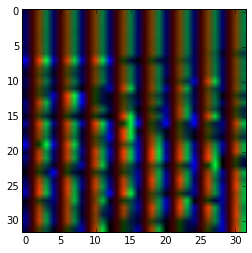

In [22]:
displayImage(x_train[113])

In [ ]:
DropoutCIFAR=net.fit(x_train, y_train)

In [30]:
predictions=DropoutCIFAR.predict(x_test)
print classification_report(y_test, predictions)
print accuracy_score(y_test, predictions)

             precision    recall  f1-score   support

          0       0.72      0.58      0.64      1000
          1       0.91      0.63      0.75      1000
          2       0.61      0.47      0.53      1000
          3       0.38      0.56      0.45      1000
          4       0.60      0.56      0.58      1000
          5       0.53      0.50      0.52      1000
          6       0.71      0.76      0.73      1000
          7       0.80      0.65      0.72      1000
          8       0.66      0.83      0.74      1000
          9       0.65      0.80      0.72      1000

avg / total       0.66      0.64      0.64     10000

0.6356


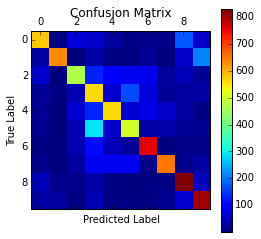

In [31]:
cm=confusion_matrix(y_test, predictions)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [32]:
x_train[123]

array([[[ 0.671875  ,  0.66796875,  0.671875  , ...,  0.67578125,
          0.6796875 ,  0.6796875 ],
        [ 0.671875  ,  0.671875  ,  0.67578125, ...,  0.67578125,
          0.67578125,  0.67578125],
        [ 0.66796875,  0.671875  ,  0.6875    , ...,  0.68359375,
          0.67578125,  0.671875  ],
        ..., 
        [ 0.671875  ,  0.671875  ,  0.671875  , ...,  0.671875  ,
          0.671875  ,  0.671875  ],
        [ 0.671875  ,  0.671875  ,  0.671875  , ...,  0.671875  ,
          0.671875  ,  0.671875  ],
        [ 0.67578125,  0.67578125,  0.67578125, ...,  0.67578125,
          0.671875  ,  0.671875  ]],

       [[ 0.7109375 ,  0.71484375,  0.72265625, ...,  0.71875   ,
          0.71875   ,  0.71875   ],
        [ 0.7109375 ,  0.71484375,  0.72265625, ...,  0.72265625,
          0.72265625,  0.72265625],
        [ 0.7109375 ,  0.71484375,  0.72265625, ...,  0.7265625 ,
          0.73046875,  0.72265625],
        ..., 
        [ 0.72265625,  0.72265625,  0.72265625, ...,

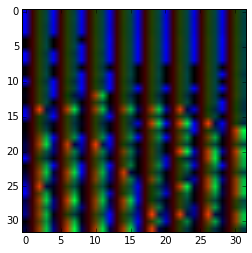

In [24]:
x_train[113]

array([[[ 0.87890625,  0.88671875,  0.8828125 , ...,  0.89453125,
          0.88671875,  0.890625  ],
        [ 0.8828125 ,  0.90234375,  0.90234375, ...,  0.703125  ,
          0.8828125 ,  0.890625  ],
        [ 0.86328125,  0.77734375,  0.78125   , ...,  0.30859375,
          0.75390625,  0.9609375 ],
        ..., 
        [ 0.7578125 ,  0.73046875,  0.73828125, ...,  0.75      ,
          0.765625  ,  0.734375  ],
        [ 0.703125  ,  0.69921875,  0.671875  , ...,  0.78515625,
          0.7734375 ,  0.78125   ],
        [ 0.359375  ,  0.3671875 ,  0.359375  , ...,  0.8046875 ,
          0.7265625 ,  0.65625   ]],

       [[ 0.95703125,  0.96484375,  0.96484375, ...,  0.97265625,
          0.96484375,  0.96875   ],
        [ 0.94140625,  0.9609375 ,  0.95703125, ...,  0.75390625,
          0.9296875 ,  0.9453125 ],
        [ 0.92578125,  0.84375   ,  0.84765625, ...,  0.32421875,
          0.76953125,  0.984375  ],
        ..., 
        [ 0.59375   ,  0.58984375,  0.56640625, ...,

# Neural Network with 684074 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   32x28x28
  2  maxpool1  32x14x14
  3  conv2d2   32x10x10
  4  maxpool2  32x5x5
  5  dense1    500
  6  drop1     500
  7  dense2    500
  8  drop2     500
  9  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       2.29687       2.30249      0.99756      0.11007  67.37s
      2       2.30401       2.30252      1.00065      0.11017  72.35s
      3       2.18802       1.98585      1.10181      0.23319  72.30s
      4       1.75925       1.59952      1.09986      0.40022  72.43s
      5       1.56025       1.43970      1.08373      0.46855  72.28s
      6       1.46659       1.35700      1.08075      0.50544  72.91s
      7       1.36619       1.29365      1.05607      0.52779  72.91s
      8       1.29204       1.20876      1.0

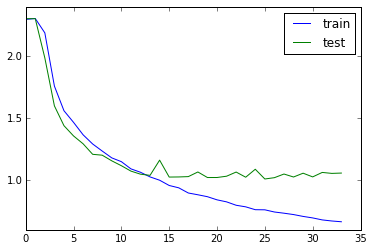

In [27]:
DropoutCIFAR=net.fit(x_train, y_train)

In [48]:
cifar3=net.fit(x_train, y_train)

# Neural Network with 301482 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   32x28x28
  2  maxpool1  32x14x14
  3  conv2d2   32x10x10
  4  maxpool2  32x5x5
  5  dense1    256
  6  drop1     256
  7  dense2    256
  8  drop2     256
  9  output    10



# Neural Network with 380842 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   32x30x30
  2  maxpool1  32x15x15
  3  conv2d2   32x12x12
  4  maxpool2  32x6x6
  5  dense1    256
  6  drop1     256
  7  dense2    256
  8  drop2     256
  9  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       1.98780       1.62062      1.22657      0.39695  56.96s
      2       1.58949       1.41303      1.12488      0.46974  57.45s
      3       1.41434       1.26040      1.12214      0.53926  58.84s
      4       1.31022       1.17375      1.11626      0.58267  59.51s
      5       1.22566       1.13520      1.07969      0.59553  58.30s
      6       1.14706       1.07694      1.06511      0.61442  57.41s
      7       1.09444       1.06421      1.02841      0.62816  58.39s
      8       1.05079       1.02871      1.0

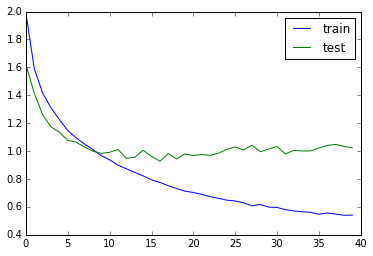

In [46]:
different_filter=net2.fit(x_train, y_train)

# Neural Network with 151498 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   32x30x30
  2  maxpool1  32x15x15
  3  conv2d2   32x14x14
  4  maxpool2  32x7x7
  5  conv2d3   32x6x6
  6  maxpool3  32x3x3
  7  dense1    256
  8  drop1     256
  9  dense2    256
 10  drop2     256
 11  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       2.16246       1.91159      1.13124      0.28293  52.08s
      2       1.77770       1.55107      1.14611      0.41940  47.78s
      3       1.56823       1.41562      1.10781      0.47557  48.51s
      4       1.45817       1.33063      1.09585      0.51187  48.74s
      5       1.37782       1.24633      1.10550      0.54717  48.25s
      6       1.30322       1.21337      1.07406      0.56102  50.43s
      7       1.25378       1.16247      1.07854      0.57812  49.61s


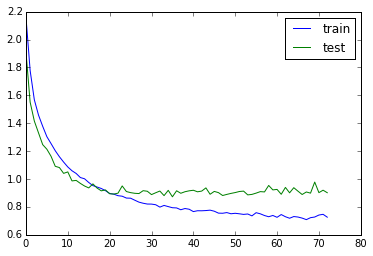

In [52]:
cifar3=net3.fit(x_train, y_train)

DEBUG: nvcc STDOUT mod.cu
   Creating library C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmpq_mwmm/d08c79c23758323abcd1575e121230fc.lib and object C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmpq_mwmm/d08c79c23758323abcd1575e121230fc.exp

DEBUG: nvcc STDOUT mod.cu
   Creating library C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmprucqw3/2421e5f17ec3961f454dba52bfc0bbf0.lib and object C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmprucqw3/2421e5f17ec3961f454dba52bfc0bbf0.exp

DEBUG: nvcc STDOUT

# Neural Network with 874058 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   32x30x30
  2  maxpool1  32x15x15
  3  conv2d2   64x14x14
  4  maxpool2  64x7x7
  5  conv2d3   128x6x6
  6  maxpool3  128x3x3
  7  dense1    500
  8  dense2    500
  9  output    10



# Neural Network with 874058 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   32x30x30
  2  maxpool1  32x15x15
  3  conv2d2   64x14x14
  4  maxpool2  64x7x7
  5  conv2d3   128x6x6
  6  maxpool3  128x3x3
  7  dense1    500
  8  dense2    500
  9  output    10



AttributeError: 'float' object has no attribute 'set_value'

# Neural Network with 555418 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   20x30x30
  2  maxpool1  20x15x15
  3  conv2d2   32x14x14
  4  maxpool2  32x7x7
  5  conv2d3   64x6x6
  6  maxpool3  64x3x3
  7  dense1    500
  8  drop1     500
  9  dense2    500
 10  drop2     500
 11  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       2.06812       1.76658      1.17069      0.35146  44.30s
      2       1.57877       1.49594      1.05537      0.45026  44.97s
      3       1.38516       1.28478      1.07813      0.53550  46.35s
      4       1.26755       1.15470      1.09773      0.58248  45.88s
      5       1.18003       1.07750      1.09515      0.61561  46.44s
      6       1.11769       1.02286      1.09272      0.63410  46.14s
      7       1.05318       1.00373      1.04927      0.64419  46.47s


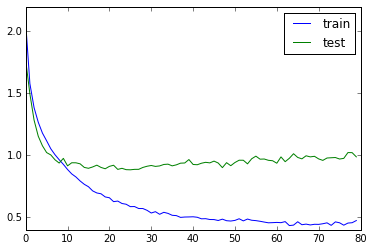

In [61]:
cifar4=net4.fit(x_train, y_train)

In [63]:
cifar2=different_filter

In [ ]:
predictions=cifar2.predict(x_test, y_test)

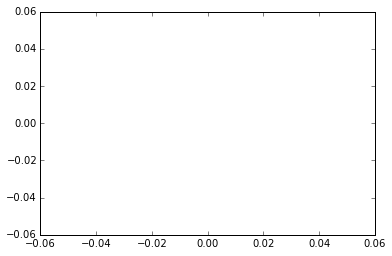

In [68]:
net5 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('conv2d3', layers.Conv2DLayer),           
            ('dense1', layers.DenseLayer),
            ('drop1', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 32, 32),

    conv2d1_num_filters=16,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),

    

    maxpool1_pool_size=(2, 2),

    conv2d2_num_filters=32,
    conv2d2_filter_size=(3, 3),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d2_W=lasagne.init.GlorotUniform(),

    maxpool2_pool_size=(2, 2),

    conv2d3_num_filters=64,
    conv2d3_filter_size=(2, 2),
    conv2d3_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d3_W=lasagne.init.GlorotUniform(),

    dense1_num_units=300,
    dense1_nonlinearity=lasagne.nonlinearities.rectify,
    
    drop1_p=0.5,

    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
    
    update=nesterov_momentum,
    on_epoch_finished=[AdjustVariable('update_learning_rate',
                                      start=0.03, 
                                      stop=0.0001), 
                       AdjustVariable('update_momentum',
                                      start=0.9,
                                      stop=0.999),
                      PlotLosses(figsize=(8, 6))],
    
    max_epochs=100,
    verbose=True,
    
)

# Neural Network with 497422 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   16x28x28
  2  maxpool1  16x14x14
  3  conv2d2   32x12x12
  4  maxpool2  32x6x6
  5  conv2d3   64x5x5
  6  dense1    300
  7  drop1     300
  8  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       1.97532       1.73618      1.13774      0.36165  38.12s
      2       1.55808       1.41357      1.10223      0.48467  39.70s
      3       1.37068       1.32530      1.03424      0.52106  42.00s
      4       1.26221       1.17913      1.07046      0.57694  41.37s
      5       1.17398       1.12120      1.04708      0.59840  39.99s
      6       1.09690       1.06980      1.02533      0.62490  40.41s
      7       1.03914       1.03993      0.99924      0.63865  40.44s
      8       0.97052       1.02798      0.94410      0.6369

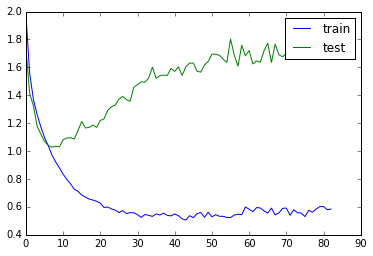

In [69]:
cifar5=net5.fit(x_train, y_train)

In [2]:
net6 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 32, 32),
    #Layer-1 Convolution
    conv1_num_filters=32, conv1_filter_size=(5, 5), conv1_nonlinearity=lasagne.nonlinearities.rectify,

    #Layer-2 Pooling
    pool1_pool_size=(2, 2),

    #Layer-3 Convolution
    conv2_num_filters=32, conv2_filter_size=(5, 5), conv2_nonlinearity=lasagne.nonlinearities.rectify,

    #Layer-4 pooling
    pool2_pool_size=(2, 2),

    #Layer-5 Convolution
    conv3_num_filters=64, conv3_filter_size=(5, 5), conv3_nonlinearity=lasagne.nonlinearities.rectify,

    #Layer-5 Dense Layer1 and Layer2
    hidden4_num_units=64, hidden4_nonlinearity=lasagne.nonlinearities.linear,
    hidden5_num_units=10, hidden5_nonlinearity=lasagne.nonlinearities.rectify,

    #Layer-8 Output Layer
    output_num_units=10, output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.001,
    update_momentum=0.9,

    regression=True,
    max_epochs=100,
    verbose=1,
    )

In [4]:
cifar6=net6.fit(x_train, y_train)

DEBUG: nvcc STDOUT mod.cu
   Creating library C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmpbbtued/7764a7cdacfa48d42f0285cc95bdf3af.lib and object C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmpbbtued/7764a7cdacfa48d42f0285cc95bdf3af.exp

DEBUG: nvcc STDOUT mod.cu
   Creating library C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmpcv5ayu/94eeeb1fbf2f501e8e69fa8d4960b601.lib and object C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmpcv5ayu/94eeeb1fbf2f501e8e69fa8d4960b601.exp

DEBUG: nvcc STDOUT mod.cu
   Creating library C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmp2eofg0/91812e0dc6bc6b8

# Neural Network with 82648 learnable parameters

## Layer information

  #  name     size
---  -------  --------
  0  input    1x32x32
  1  conv1    32x28x28
  2  pool1    32x14x14
  3  conv2    32x10x10
  4  pool2    32x5x5
  5  conv3    64x1x1
  6  hidden4  64
  7  hidden5  10
  8  output   10



 mod.cu
   Creating library C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmpsry8mn/41e07c5a2e811a92baaf58c5c863ce40.lib and object C:/Users/admin/AppData/Local/Theano/compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-2.7.8-64/tmpsry8mn/41e07c5a2e811a92baaf58c5c863ce40.exp



ValueError: GpuCorrMM images and kernel must have the same stack size

Apply node that caused the error: GpuCorrMM{valid, (1, 1)}(GpuContiguous.0, GpuContiguous.0)
Toposort index: 29
Inputs types: [CudaNdarrayType(float32, 4D), CudaNdarrayType(float32, 4D)]
Inputs shapes: [(128, 3, 32, 32), (32, 1, 5, 5)]
Inputs strides: [(3072, 1024, 32, 1), (25, 0, 5, 1)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[GpuElemwise{Add}[(0, 0)](GpuCorrMM{valid, (1, 1)}.0, GpuDimShuffle{x,0,x,x}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

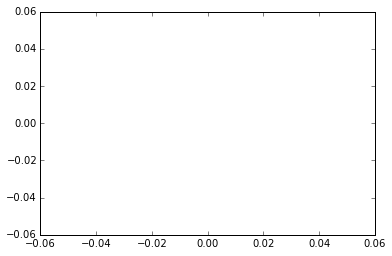

In [2]:
net6 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('conv2d3', layers.Conv2DLayer),           
            ('dense1', layers.DenseLayer),
            ('drop1', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 32, 32),

    conv2d1_num_filters=48,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_pad=(2, 2),
    conv2d1_W=lasagne.init.GlorotUniform(),

    

    maxpool1_pool_size=(2, 2),

    conv2d2_num_filters=64,
    conv2d2_filter_size=(3, 3),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d2_W=lasagne.init.GlorotUniform(),

    maxpool2_pool_size=(2, 2),

    conv2d3_num_filters=128,
    conv2d3_filter_size=(3, 3),
    conv2d3_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d3_W=lasagne.init.GlorotUniform(),

    dense1_num_units=500,
    dense1_nonlinearity=lasagne.nonlinearities.rectify,
    
    drop1_p=0.5,

    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
    
    update=nesterov_momentum,
    on_epoch_finished=[AdjustVariable('update_learning_rate',
                                      start=0.03, 
                                      stop=0.0001), 
                       AdjustVariable('update_momentum',
                                      start=0.9,
                                      stop=0.999),
                      PlotLosses(figsize=(8, 6))],
    
    max_epochs=100,
    verbose=True,
    
)

In [14]:
x_train, y_train, x_test, y_test = load_data(os.path.expanduser('F:/pandas-ex/mnist-test/cifar-10-batches-py'))

# Neural Network with 1710726 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   48x32x32
  2  maxpool1  48x16x16
  3  conv2d2   64x14x14
  4  maxpool2  64x7x7
  5  conv2d3   128x5x5
  6  dense1    500
  7  drop1     500
  8  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -------
      1       2.12016       1.75975      1.20480      0.34998  144.79s
      2       1.61773       1.47178      1.09917      0.46479  148.26s
      3       1.38381       1.26498      1.09394      0.54569  148.41s
      4       1.23134       1.13476      1.08511      0.59345  148.07s
      5       1.10930       1.05390      1.05257      0.63291  148.17s
      6       1.00123       0.99939      1.00183      0.65190  148.23s
      7       0.91068       0.98320      0.92624      0.66347  148.52s
      8       0.82606       0.97798      0.84466  

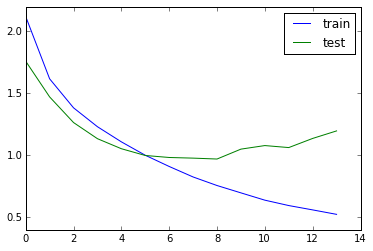

In [4]:
cifar6=net6.fit(x_train, y_train)

In [7]:
cifar6.predict(x_test)

array([3, 8, 0, ..., 5, 1, 7], dtype=int64)

In [11]:
predictions=cifar6.predict(x_test)

In [12]:
print classification_report(y_test, predictions)
print accuracy_score(y_test, predictions)

             precision    recall  f1-score   support

          0       0.67      0.74      0.70      1000
          1       0.80      0.72      0.75      1000
          2       0.63      0.51      0.57      1000
          3       0.43      0.52      0.47      1000
          4       0.59      0.60      0.60      1000
          5       0.52      0.57      0.54      1000
          6       0.73      0.68      0.71      1000
          7       0.70      0.70      0.70      1000
          8       0.85      0.71      0.77      1000
          9       0.67      0.76      0.71      1000

avg / total       0.66      0.65      0.65     10000

0.6498


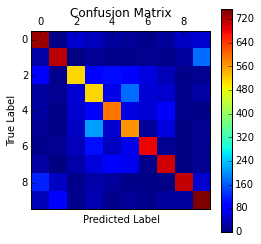

In [13]:
cm=confusion_matrix(y_test, predictions)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [14]:
with open('cifar6.pickle', 'wb') as f:
    pickle.dump(cifar6,f, -1)

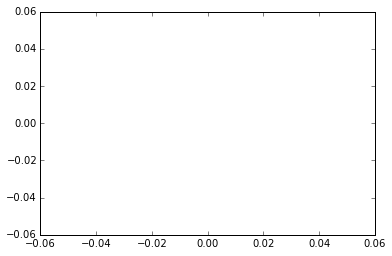

In [16]:
net3Modified = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('conv2d3', layers.Conv2DLayer),
            ('maxpool3', layers.MaxPool2DLayer),           
            ('dense1', layers.DenseLayer),
            ('drop1', layers.DropoutLayer),
            ('dense2', layers.DenseLayer),
            ('drop2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 32, 32),

    conv2d1_num_filters=48,
    conv2d1_filter_size=(3, 3),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),

    

    maxpool1_pool_size=(2, 2),

    conv2d2_num_filters=64,
    conv2d2_filter_size=(2, 2),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d2_W=lasagne.init.GlorotUniform(),

    maxpool2_pool_size=(2, 2),

    conv2d3_num_filters=128,
    conv2d3_filter_size=(2, 2),
    conv2d3_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d3_W=lasagne.init.GlorotUniform(),

    maxpool3_pool_size=(2, 2),

    dense1_num_units=500,
    dense1_nonlinearity=lasagne.nonlinearities.rectify,
    
    drop1_p=0.5,

    dense2_num_units=500,
    
    dense2_nonlinearity=lasagne.nonlinearities.rectify,
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
    
    drop2_p=0.5,

    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    
    update=nesterov_momentum,
    on_epoch_finished=[AdjustVariable('update_learning_rate',
                                      start=0.03, 
                                      stop=0.0001), 
                       AdjustVariable('update_momentum',
                                      start=0.9,
                                      stop=0.999),
                      PlotLosses(figsize=(8, 6))],
    
    max_epochs=500,
    verbose=True,
    
)

In [25]:
def load_data2(path):
    x_train = np.zeros((50000, 3, 32, 32), dtype='uint8')
    y_train = np.zeros((50000,), dtype="uint8")

    for i in range(1, 6):
        data = unpickle(os.path.join(path, 'data_batch_' + str(i)))
        images = data['data'].reshape(10000, 3, 32, 32)
        labels = data['labels']
        x_train[(i - 1) * 10000:i * 10000, :, :, :] = images
        y_train[(i - 1) * 10000:i * 10000] = labels

    test_data = unpickle(os.path.join(path, 'test_batch'))
    x_test = test_data['data'].reshape(10000, 3, 32, 32)
    y_test = np.array(test_data['labels'])

    return x_train, y_train, x_test, y_test

# Neural Network with 878602 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x32x32
  1  conv2d1   48x30x30
  2  maxpool1  48x15x15
  3  conv2d2   64x14x14
  4  maxpool2  64x7x7
  5  conv2d3   128x6x6
  6  maxpool3  128x3x3
  7  dense1    500
  8  drop1     500
  9  dense2    500
 10  drop2     500
 11  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       1.99080       1.69303      1.17588      0.36640  99.60s
      2       1.51979       1.29027      1.17789      0.53244  101.82s
      3       1.30362       1.18372      1.10129      0.57723  102.08s
      4       1.16269       1.04954      1.10781      0.63133  101.95s
      5       1.06316       1.00107      1.06203      0.65032  102.38s
      6       0.97112       0.94434      1.02835      0.67029  101.95s
      7       0.90445       0.92263      0.98029      0.67642  

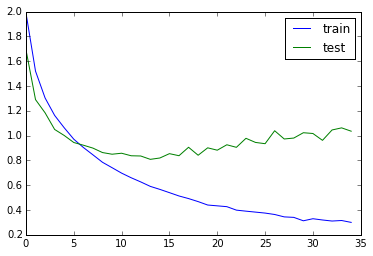

In [17]:
cifar7=net3Modified.fit(x_train, y_train)

In [18]:
predictions=cifar7.predict(x_test)

In [19]:
print classification_report(y_test, predictions)
print accuracy_score(y_test, predictions)

             precision    recall  f1-score   support

          0       0.82      0.73      0.77      1000
          1       0.90      0.80      0.85      1000
          2       0.77      0.50      0.61      1000
          3       0.51      0.55      0.53      1000
          4       0.69      0.63      0.66      1000
          5       0.53      0.70      0.60      1000
          6       0.66      0.89      0.76      1000
          7       0.79      0.75      0.77      1000
          8       0.86      0.82      0.84      1000
          9       0.81      0.81      0.81      1000

avg / total       0.73      0.72      0.72     10000

0.7181


In [5]:
file_cifar=open('cifar6.pickle', 'r')

In [6]:
cifar6=pickle.load(file_cifar)

EOFError: 

In [10]:
cifar6=unpickle("cifar6.pickle")

EOFError: 

In [20]:
with open('cifar7.pickle', 'wb') as f:
    pickle.dump(cifar7,f, -1)

In [33]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
def displayImage(image, name):
    img=np.ascontiguousarray(image.transpose(1,2,0))
    img = Image.fromarray(img, 'RGB')
    plt.label(set_value(name))
    plt.imshow(img)
    plt.show()

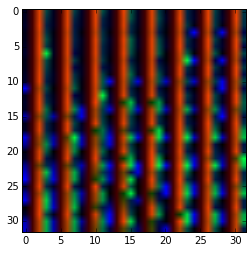

In [26]:
x_train2, y_train2, x_test2, y_test2 = load_data2(os.path.expanduser('F:/pandas-ex/mnist-test/cifar-10-batches-py'))

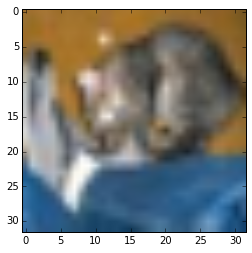

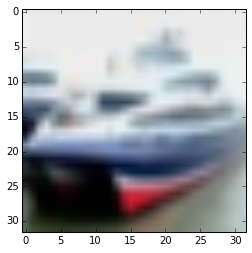

(None, None)

In [31]:
displayImage(x_test2[0]), displayImage(x_test2[1])

C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:423: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


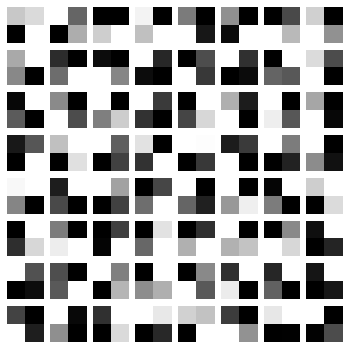

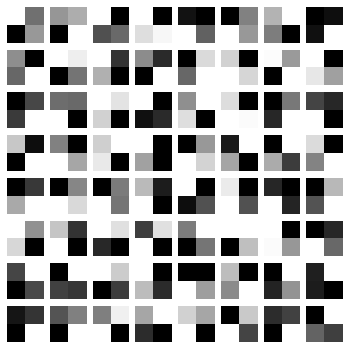

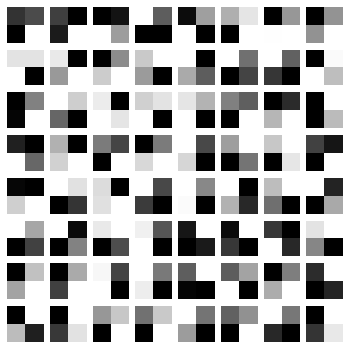

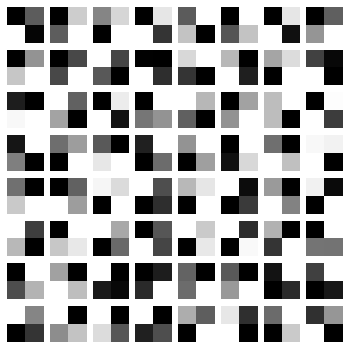

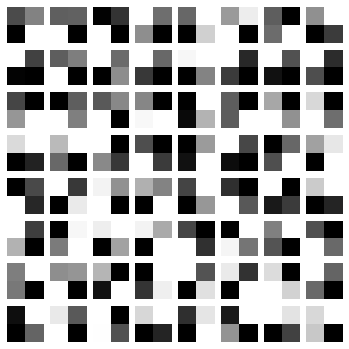

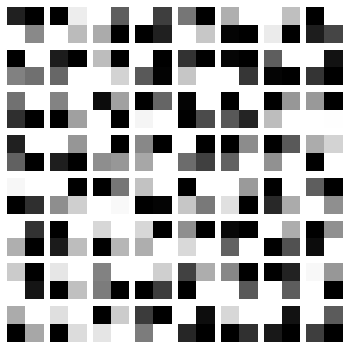

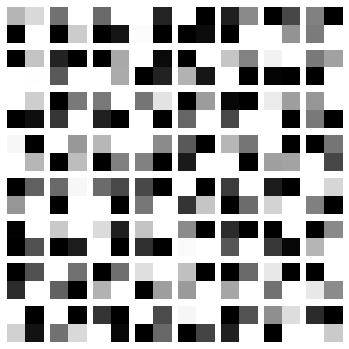

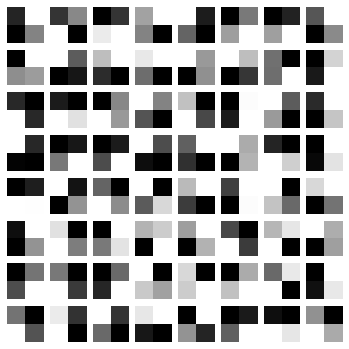

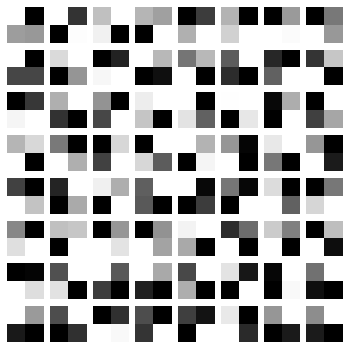

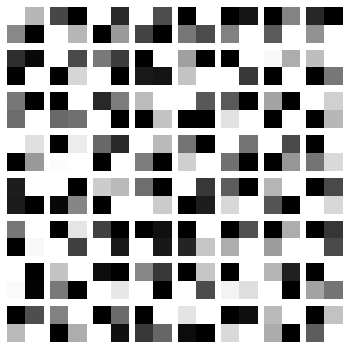

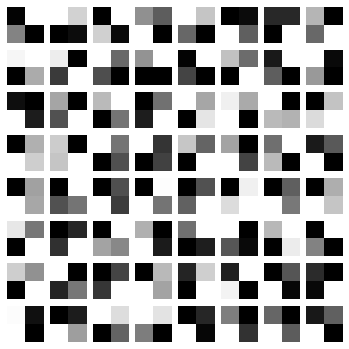

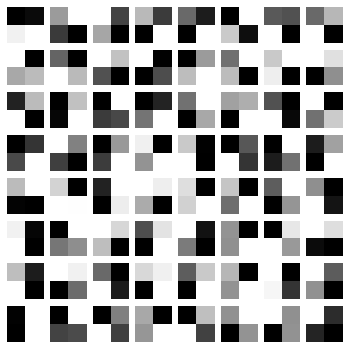

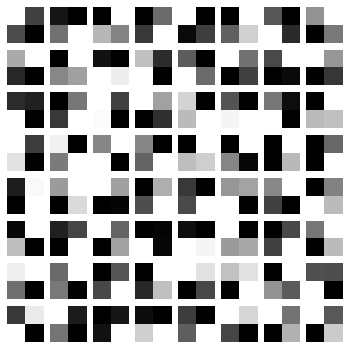

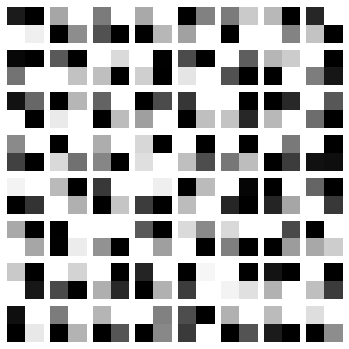

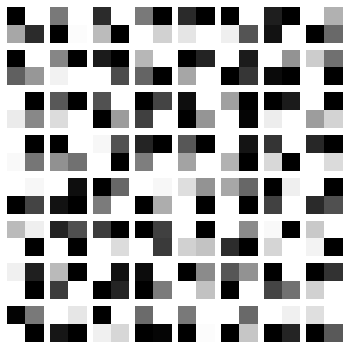

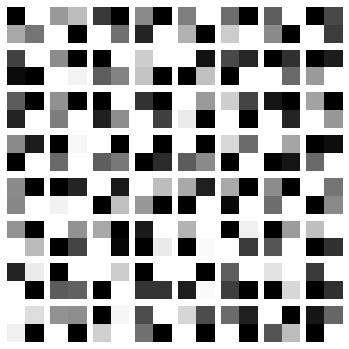

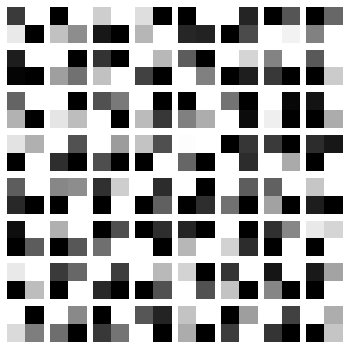

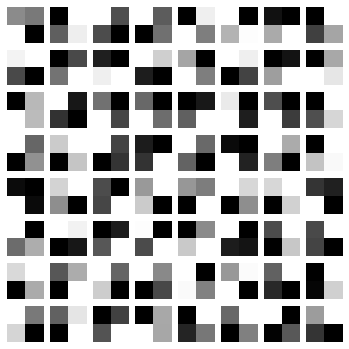

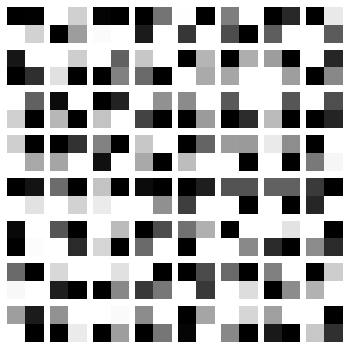

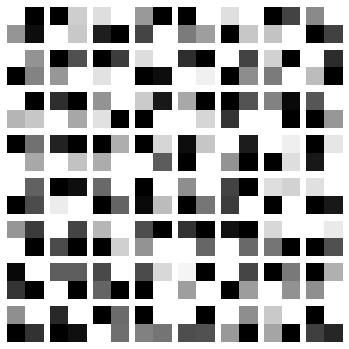

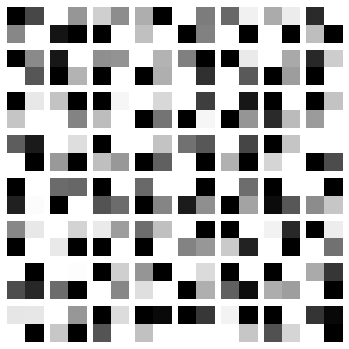

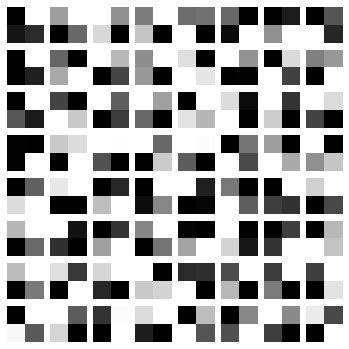

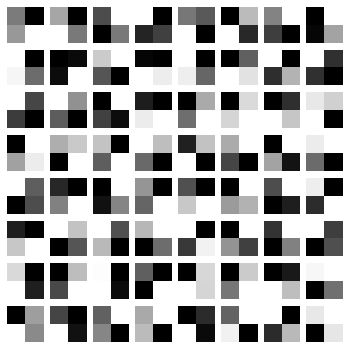

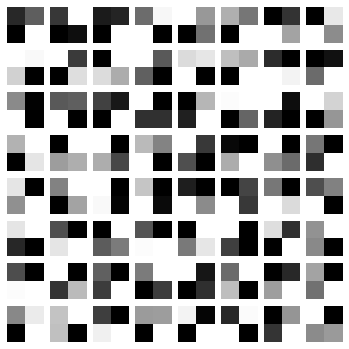

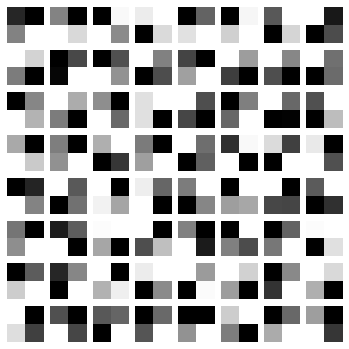

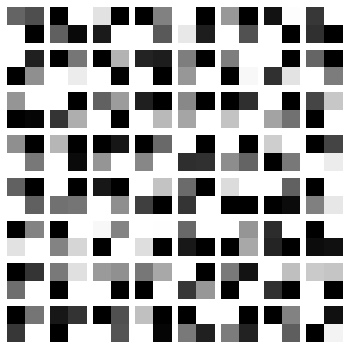

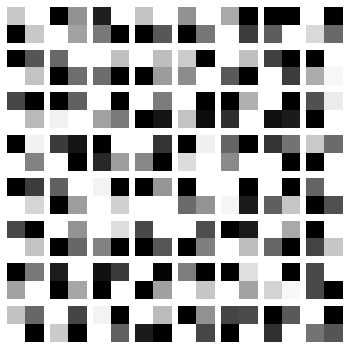

In [ ]:
visualize.plot_conv_weights(cifar7.layers_['conv2d2'])

5

In [ ]:
displayImage

In [1]:
import cPickle as pickle
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Using gpu device 0: GeForce 820M (CNMeM is disabled)


ImportError: No module named tabulate